# DM2: "Connexionism: backpropagation algorithm"

-----------------------------

_Eole Cervenka, Nov 13th 2017_

+ Python version: 3.6
+ libraries: sklean, numpy, pandas
+ dependencies:

    + `Eole_Cervenka_DM2_preparation.ipynb`
    + `Eole_Cervenka_DM2_exploration.ipynb`
    + `Eole_Cervenka_DM2_MLP.ipynb`
        
+ Data:
    + `data.csv` (cf Preparation section)
    
-----------------------------
    
## Part I - Breast cancer data

### Preparation


The input data in file `breast-cancer.arff` is converted to `.csv` formatted file: `data.csv` such as:

```
'age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat','Class'
'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
...
```

## Preparation

### helper functions

In [29]:
%run utils/helper_functions.ipynb

In [30]:
%run utils/preparation.ipynb

In [31]:
%run utils/exploration.ipynb

In [32]:
%run utils/MLP_utils.ipynb

### data set

I use the `pandas` library to load and manipulate the dataset.

In [33]:
import pandas as pd

fpath = "data.csv"
df = pd.read_csv(fpath, quotechar="'")

df.rename( columns={
        'tumor-size': 'tumor_size',
        'inv-nodes': 'inv_nodes',
        'node-caps' : 'node_caps',
        'deg-malig' : 'deg_malig',
        'breast-quad' : 'breast_quad'
    }, inplace=True)

df.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,ft_low,NaN,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


### Exploration

In [34]:
attr_dict = attr_val_freq(df)

print("attribute value-frequency:")
pprint(attr_dict)

attribute value-frequency:
{
  "age": {
    "40-49": 90,
    "50-59": 96,
    "60-69": 57,
    "30-39": 36,
    "70-79": 6,
    "20-29": 1
  },
  "menopause": {
    "premeno": 150,
    "ge40": 129,
    "lt40": 7
  },
  "tumor_size": {
    "15-19": 30,
    "35-39": 19,
    "30-34": 60,
    "25-29": 54,
    "40-44": 22,
    "10-14": 28,
    "0-4": 8,
    "20-24": 50,
    "45-49": 3,
    "50-54": 8,
    "5-9": 4
  },
  "inv_nodes": {
    "0-2": 213,
    "3-5": 36,
    "15-17": 6,
    "6-8": 17,
    "9-11": 10,
    "24-26": 1,
    "12-14": 3
  },
  "node_caps": {
    "yes": 56,
    "no": 222,
    "?": 8
  },
  "deg_malig": {
    "3": 85,
    "1": 71,
    "2": 130
  },
  "breast": {
    "right": 134,
    "left": 152
  },
  "breast_quad": {
    "left_up": 97,
    "central": 21,
    "ft_low": 1,
    "left_low": 109,
    "right_up": 33,
    "right_low": 24,
    "?": 1
  },
  "irradiat": {
    "no": 217,
    "NaN": 1,
    "yes": 68
  },
  "Class": {
    "recurrence-events": 85,
    "no-recurren

In [35]:
# Attribut description
# Histogram de frequence des valeurs possible par attribut

# np.histogram...

# import matplotlib.pyplot as plt
# rng = np.random.RandomState(10)  # deterministic random data
# a = np.hstack((rng.normal(size=1000),
#                 rng.normal(loc=5, scale=2, size=1000)))

# plt.hist(a, bins='auto')  # arguments are passed to np.histogram
# plt.title("Histogram with 'auto' bins")
# plt.show()

### Data preparation

1. Deal with missing attributes
2. Categorical values encoding

#### Missing values

Remove records with value `'?'` in attribute `node_caps` or `breast_quad`, or with value `'NaN'` in attribute `irradiat`

In [36]:
df = remove_missing_values(df)
df.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
5,50-59,premeno,25-29,3-5,no,2,right,left_up,yes,no-recurrence-events


#### Categorical values encoding

In [37]:
df_encoded, label_encoder = encode_df(df)
df_encoded.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,Class
0,2,2,2,0,2,2,1,3,0,1
1,3,0,2,0,1,0,1,1,0,0
3,2,2,6,0,2,2,1,2,1,0
4,2,2,5,4,2,1,0,5,0,1
5,3,2,4,4,1,1,1,3,1,0


### Attribute overview

In [38]:
val_dict = attr_val_dict(df_encoded)

fpath = "/tmp/DM2_attr_val_encoded.json"
save_json(val_dict, fpath)

for k, v in val_dict.items(): print(k, sorted(v))

age [0, 1, 2, 3, 4, 5]
menopause [0, 1, 2]
tumor_size [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
inv_nodes [0, 1, 2, 3, 4, 5, 6]
node_caps [0, 1, 2]
deg_malig [0, 1, 2]
breast [0, 1]
breast_quad [0, 1, 2, 3, 4, 5]
irradiat [0, 1]
Class [0, 1]


### X, y (input matrix, label vector)

In [43]:
# matrix input X and label vector y
X, y = get_nn_inputs(df_encoded)

# Preview
print("X  --sample records:")
for r in X[:10]:
    print(r)
print("...")
print("\ny --sample labels")
print(y[:10], '\n')

# Save to pkl
training_data = (X, y)
save_pickle(training_data, '/tmp/training.pkl')

X  --sample records:
(2, 2, 2, 0, 2, 2, 1, 3, 0)
(3, 0, 2, 0, 1, 0, 1, 1, 0)
(2, 2, 6, 0, 2, 2, 1, 2, 1)
(2, 2, 5, 4, 2, 1, 0, 5, 0)
(3, 2, 4, 4, 1, 1, 1, 3, 1)
(3, 0, 7, 0, 1, 2, 0, 3, 0)
(2, 2, 1, 0, 1, 1, 0, 3, 0)
(2, 2, 0, 0, 1, 1, 1, 4, 0)
(2, 0, 7, 2, 2, 1, 1, 3, 1)
(3, 2, 4, 0, 1, 1, 0, 2, 0)
...

y --sample labels
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0] 

(X, y) saved to '/tmp/training.pkl'


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

steps = [
    ('scaler', StandardScaler()), # data scaling
    ('clf', MLPClassifier()) # Multilayer Perceptron
]

pipeline = Pipeline(steps)

### Hyper-parameters

In [15]:
import numpy as np
from itertools import product

max_layers = 5
max_neurons = 20
layer_space_list = []
for i in range(1, max_layers+1):
    i_layers = list(product(list(range(1, max_neurons+1)), repeat=i))
    layer_space_list.extend(i_layers) # all config: i layers
layer_space = tuple(layer_space_list)

param_grid = {
    'clf__hidden_layer_sizes' : layer_space, # (100,)
    'clf__max_iter' : (600, 800, 1000),
    'clf__activation' : ['identity', 'logistic', 'tanh', 'relu'], # 'relu'
    'clf__solver' : ['lbfgs', 'sgd', 'adam'], #'adam'
    'clf__alpha' : np.linspace(start=0.00001, stop=0.001, num=50), #0.0001
    'clf__learning_rate' : ['constant', 'invscaling', 'adaptive'], #'constant'
    'clf__learning_rate_init' : np.linspace(start=0.0001, stop=0.01, num=50), #0.001
    'clf__momentum' : np.linspace(start=0.1, stop=1, num=10) #0.9
}

### Random search, cross-validated (k=10)

In [16]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=100, # search-iterations
    n_jobs=8, # parallel jobs
    refit=True,
    cv=10, # 10-fold cross-validation
    verbose=0,
    random_state=None
)

random_search.fit(X, y)

# .../.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564:
# ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
#   % self.max_iter, ConvergenceWarning)

/home/eolus/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/eolus/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/eolus/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/eolus/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.ma

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rat...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=8,
          param_distributions={'clf__hidden_layer_sizes': ((1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (16,), (17,), (18,), (19,), (20,), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1,... ,  0.01   ]), 'clf__momentum': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])},
          pre_dispatch='2*

### Retrieve best performing hyperparameters

In [18]:
best_params_pipeline = random_search.best_params_
best_score_pipeline = random_search.best_score_

clf_args = {
    'activation' : best_params_pipeline['clf__activation'],
    'alpha' : best_params_pipeline['clf__alpha'],
    'hidden_layer_sizes' : best_params_pipeline['clf__hidden_layer_sizes'],
    'learning_rate' : best_params_pipeline['clf__learning_rate'],
    'learning_rate_init' : best_params_pipeline['clf__learning_rate_init'],
    'max_iter' : best_params_pipeline['clf__max_iter'],
    'max_iter' : best_params_pipeline['clf__max_iter'],
    'momentum' : best_params_pipeline['clf__momentum'],
    'solver' : best_params_pipeline['clf__solver']
}

print("best params [score={}]:".format(best_score_pipeline))
pprint(clf_args)

best params [score=0.7473684210526316]:
{
  "activation": "identity",
  "alpha": 0.0007575510204081633,
  "hidden_layer_sizes": [
    13,
    9,
    10,
    4,
    8
  ],
  "learning_rate": "invscaling",
  "learning_rate_init": 0.0077775510204081645,
  "max_iter": 1000,
  "momentum": 0.9,
  "solver": "adam"
}


### Discussion: choosing the K in K-fold

**Le système apprend sur 10 sous-bases d’apprentissage et calcule à la fin les statistiques de performance.  
Qu’en pensez-vous pour le problème étudié ?**


We have to train a Neural Network (multi-layer perceptron) using a dataset of 286 labelled records with 9 attributes. The model is trying to predict based on a patient's attribute, whether they will have a recurrence of events (`Class : ['recurrence-events', 'no-recurrence-events']`).

Note that in an actual use-case, this may imply that we are more interested in a model that minimizes the number of false-negatives (instances in which the model fails to predict a recurrence of events) than one that minimizes the overall expected error. For simplicity however, we use the expected error as the loss function.

We use k-fold cross-validation to select the model which expected error is the smallest.  
In k-fold cross-validation:  
"_The original sample is randomly partitioned into k equal sized subsamples.  
Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling (see below) is that all observations are used for both training and validation, and each observation is used for validation exactly once. 10-fold cross-validation is commonly used,[7] but in general k remains an unfixed parameter._"  
[Wikipedia](https://en.wikipedia.org/wiki/Cross-validation_(statistics)

We understand that the choice of defaulting the value of k to 10 is arbitrary.  
The size of the training data impacts bias error and variance error.  
The choice of k changes the size of each fold. (Provided `k` is a divisor of `dataset_size`:)
```
fold_size = dataset_size / k
```

We know that the increase size of the training set result in decrease of bias error and increase of variance error.

Therefore, a larger k (and smaller fold size) results in smaller bias error (less underfitting) and larger variance error (more overfitting).

**Graphical representation: learning curves**

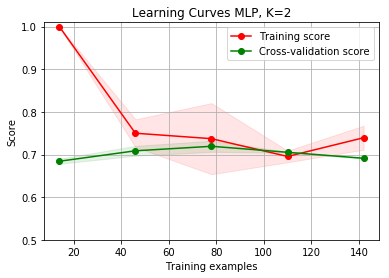

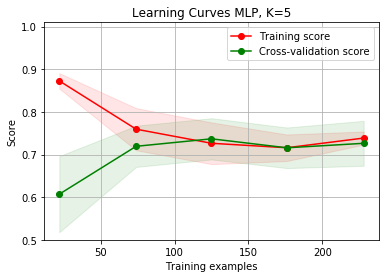

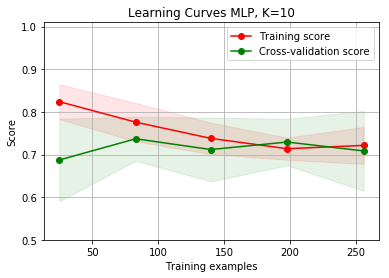

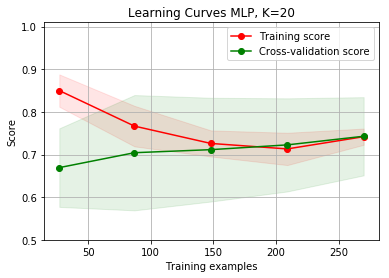

In [44]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

estimator = MLPClassifier(**clf_args)
split_sizes = [2, 5, 10, 20]
for K in split_sizes:
    cv = KFold(n_splits=K, shuffle=False, random_state=None)
    title = "Learning Curves MLP, K={}".format(K)
    plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()